<a href="https://colab.research.google.com/github/yuktash/Bike-Sharing-Demand-Prediction-/blob/main/Day4_Bike_Sharing_Demand_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


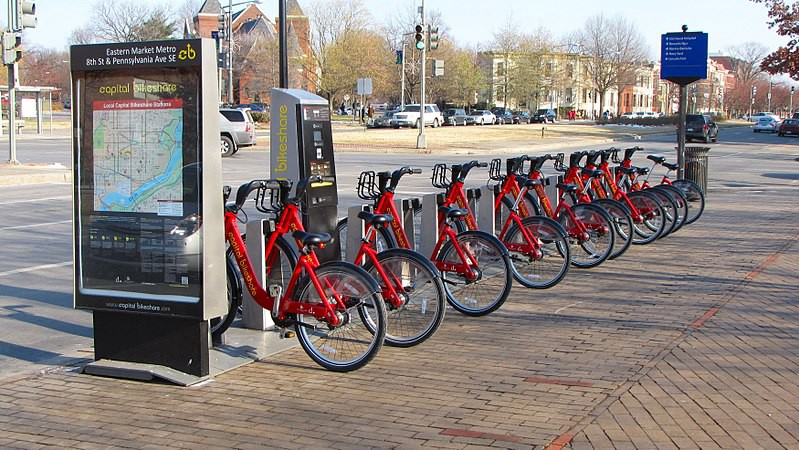

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px
from datetime import date

sns.set_style('darkgrid')

# importing library called warning to ignore warnings.
import warnings
warnings.filterwarnings("ignore")

In [3]:
# load & save data
data=pd.read_csv('/content/drive/MyDrive/Data/SeoulBikeData.csv',encoding='latin-1')

In [4]:
# creating copy so as to not disturb original dataset
df=data.copy()

 **Data Inspection**

In [5]:
# checking top 5 rows
df.head().T

,0,1,2,3,4
Date,01/12/2017,01/12/2017,01/12/2017,01/12/2017,01/12/2017
Rented Bike Count,254,204,173,107,78
Hour,0,1,2,3,4
Temperature(°C),-5.2,-5.5,-6.0,-6.2,-6.0
Humidity(%),37,38,39,40,36
Wind speed (m/s),2.2,0.8,1.0,0.9,2.3
Visibility (10m),2000,2000,2000,2000,2000
Dew point temperature(°C),-17.6,-17.6,-17.7,-17.6,-18.6
Solar Radiation (MJ/m2),0.0,0.0,0.0,0.0,0.0
Rainfall(mm),0.0,0.0,0.0,0.0,0.0


In [6]:
# checking botton 5 rows
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [7]:
# checking random samples of data
df.sample(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
3497,25/04/2018,1878,17,22.9,23,2.8,1985,0.6,1.64,0.0,0.0,Spring,No Holiday,Yes
1489,01/02/2018,149,1,-5.4,54,1.7,1996,-13.2,0.00,0.0,1.6,Winter,No Holiday,Yes
4746,16/06/2018,2451,18,28.0,46,2.3,1833,15.2,1.23,0.0,0.0,Summer,No Holiday,Yes
6931,15/09/2018,1578,19,23.8,78,2.2,1991,19.7,0.00,0.0,0.0,Autumn,No Holiday,Yes
7468,08/10/2018,123,4,10.4,61,0.6,2000,3.1,0.00,0.0,0.0,Autumn,No Holiday,Yes


In [8]:
# rows & columns of data
df.shape

(8760, 14)

In [9]:
# total datapoints
df.size

122640

In [10]:
# checking Non-null & datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

**No missing data**

In [11]:
# Statistical information for Numrical variables
df.describe().round(2)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00
mean,704.60,11.50,12.88,58.23,1.72,1436.83,4.07,0.57,0.15,0.08
std,645.00,6.92,11.94,20.36,1.04,608.30,13.06,0.87,1.13,0.44
min,0.00,0.00,-17.80,0.00,0.00,27.00,-30.60,0.00,0.00,0.00
25%,191.00,5.75,3.50,42.00,0.90,940.00,-4.70,0.00,0.00,0.00
50%,504.50,11.50,13.70,57.00,1.50,1698.00,5.10,0.01,0.00,0.00
75%,1065.25,17.25,22.50,74.00,2.30,2000.00,14.80,0.93,0.00,0.00
max,3556.00,23.00,39.40,98.00,7.40,2000.00,27.20,3.52,35.00,8.80


In [12]:
# statistical information for Categorical features
df.describe(include='O')

,Date,Seasons,Holiday,Functioning Day
count,8760,8760,8760,8760
unique,365,4,2,2
top,01/12/2017,Spring,No Holiday,Yes
freq,24,2208,8328,8465


**Missing value Inspection**

In [13]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**Check Duplicates**

In [14]:
df.duplicated().sum()

0

In [15]:
numrical_var=['Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

**Outliers Detection**

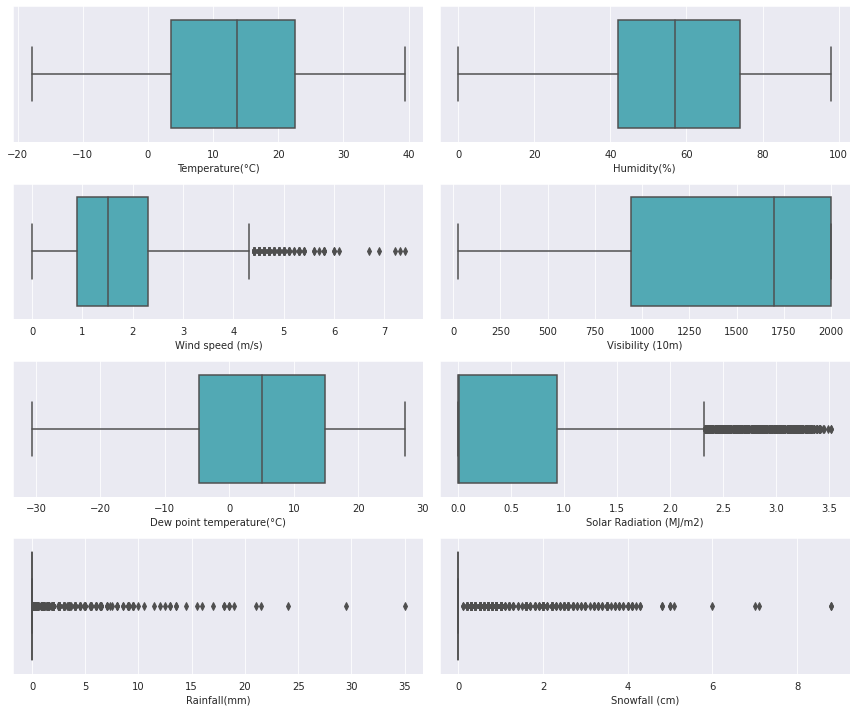

In [16]:
# Detecting outliers with boxplot
numrical_var=['Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

plt.figure(figsize=(12,10))
n=1
for i in numrical_var:
  plt.subplot(4,2,n)
  n=n+1
  sns.boxplot(df[i],palette='YlGnBu_r')
  plt.tight_layout()

In [17]:
# extracting day,month,year from date
from datetime import date
df['Date']=pd.to_datetime(df['Date'])

df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.day
df['day_name']=df['Date'].dt.day_name()

In [18]:
df['Hour']=df['Hour'].astype('object')

**Exploratory Data Analysis**

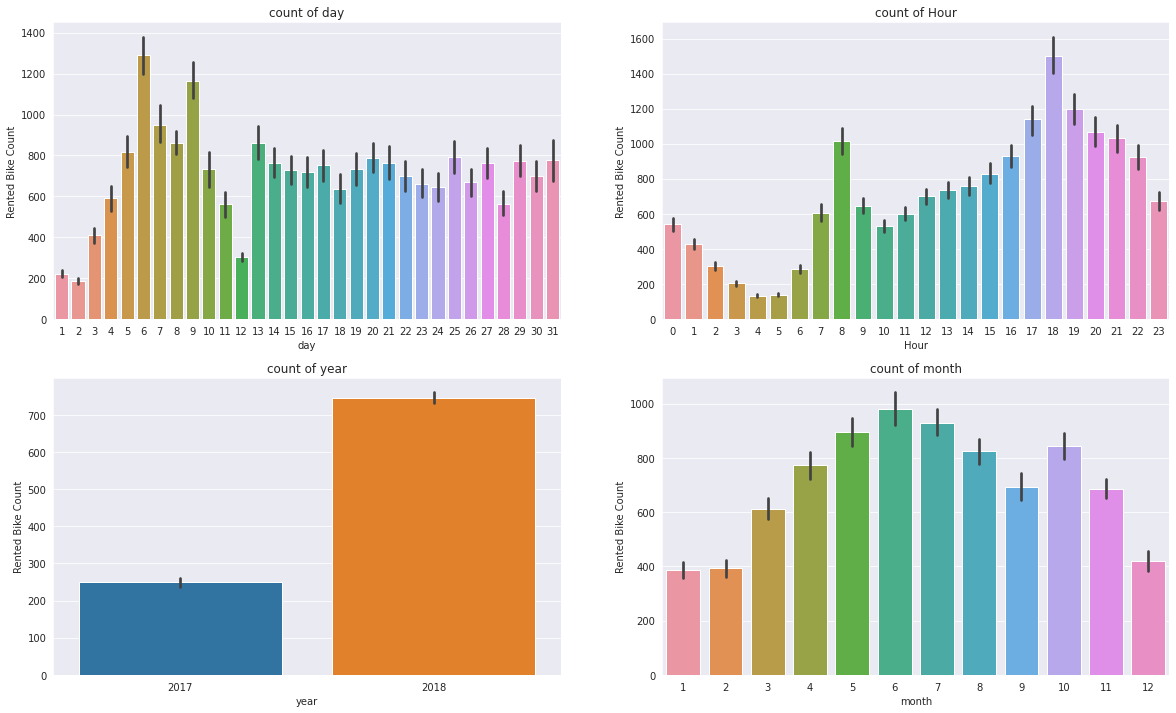

In [19]:
cols = ['day','Hour','year','month']

n=1
plt.figure(figsize=(20,12))
for i in cols:
  plt.subplot(2,2,n)
  n=n+1
  sns.barplot(data=df,x=i,y='Rented Bike Count')
  plt.title(f"count of {i}")
plt.show()

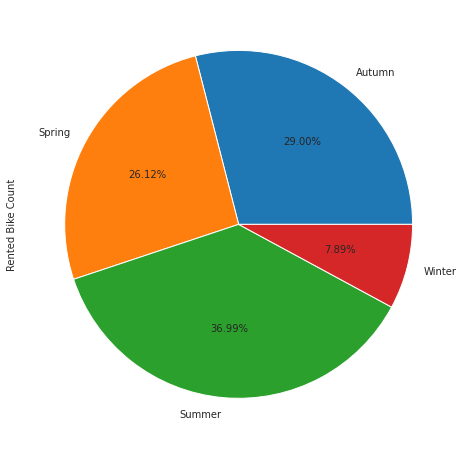

In [20]:
plt.figure(figsize=(8,8))
df.groupby('Seasons').sum()['Rented Bike Count'].plot.pie(autopct="%.2f%%")
plt.show()

In [21]:
df.groupby('Hour').sum()['Solar Radiation (MJ/m2)']

Hour
0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
5       0.00
6       2.33
7      34.30
8     129.56
9     281.03
10    448.01
11    578.64
12    665.07
13    691.83
14    653.35
15    570.77
16    443.44
17    290.87
18    143.65
19     47.60
20      4.96
21      0.00
22      0.00
23      0.00
Name: Solar Radiation (MJ/m2), dtype: float64

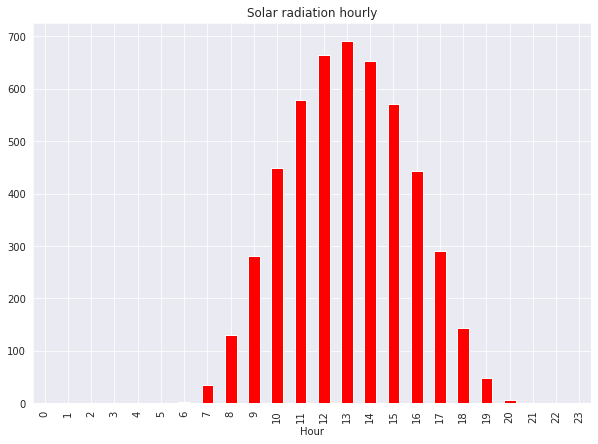

In [22]:
plt.figure(figsize=(10,7))
df.groupby('Hour').sum()['Solar Radiation (MJ/m2)'].plot(kind='bar', color='red',)
plt.title('Solar radiation hourly')
plt.show()

In [23]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

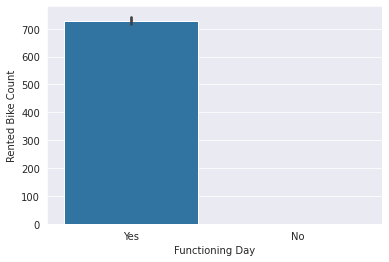

In [24]:
sns.barplot(data=df,x='Functioning Day',y='Rented Bike Count')

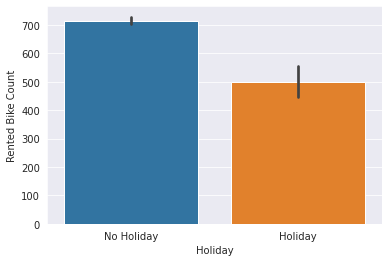

In [25]:
sns.barplot(data=df,x='Holiday',y='Rented Bike Count')

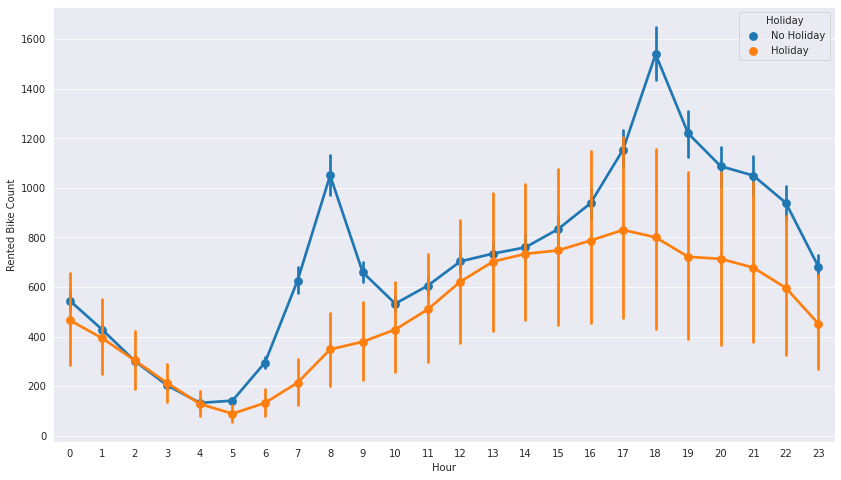

In [26]:
plt.figure(figsize=(14,8))
sns.pointplot(data=df,y='Rented Bike Count',x='Hour',hue='Holiday')

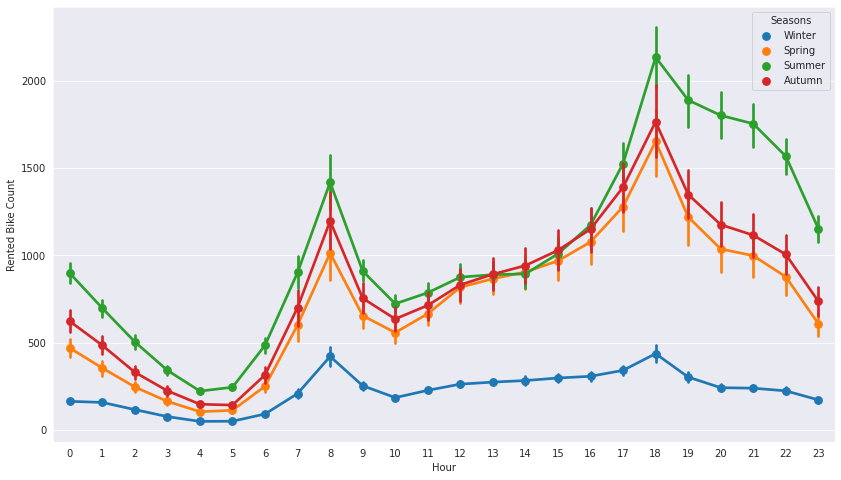

In [27]:
plt.figure(figsize=(14,8))
sns.pointplot(data=df,y='Rented Bike Count',x='Hour',hue='Seasons')


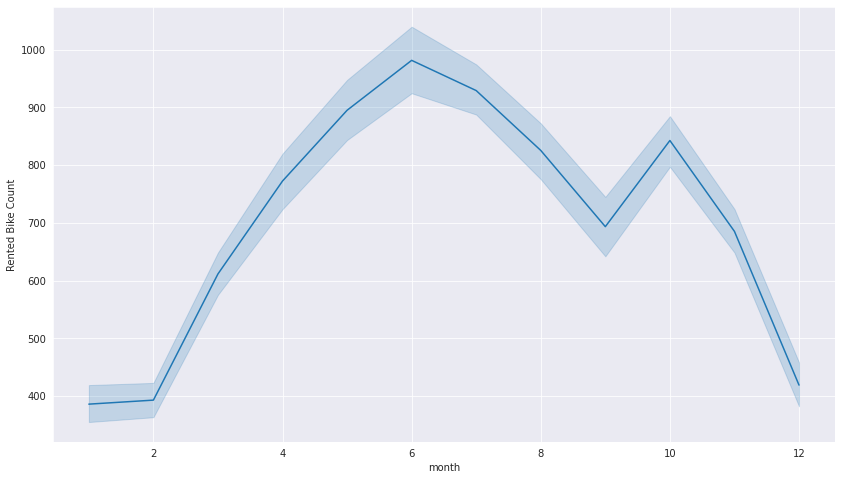

In [28]:
plt.figure(figsize=(14,8))
sns.lineplot(data=df,y='Rented Bike Count',x='month')

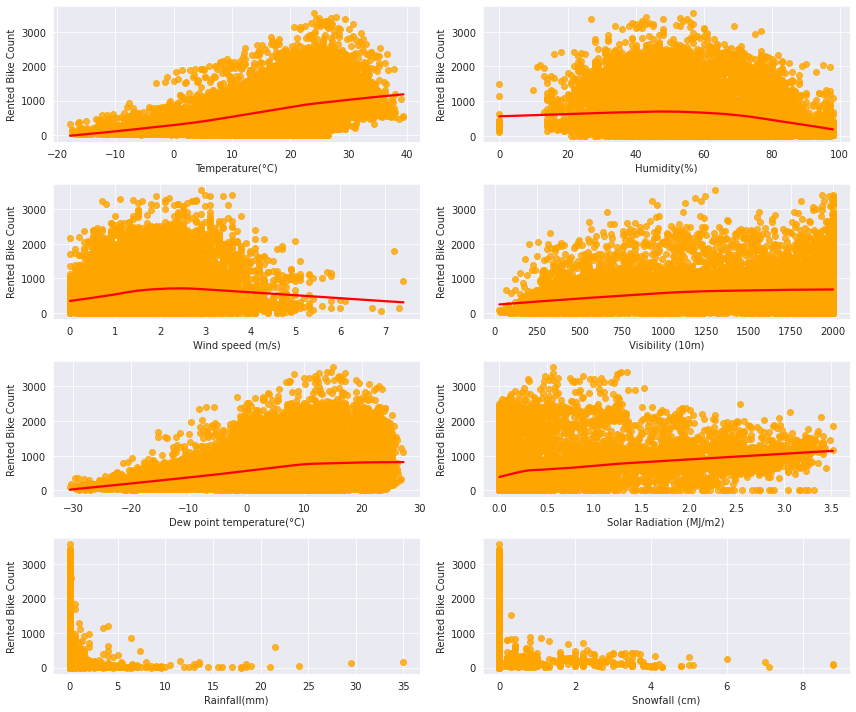

In [29]:
numrical_var=['Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

plt.figure(figsize=(12,10))
n=1
for i in numrical_var:
  plt.subplot(4,2,n)
  n=n+1
  sns.regplot(df[i],y=df['Rented Bike Count'],scatter_kws={"color": "orange"}, line_kws={"color": "red"},lowess=True)
  plt.tight_layout()

# **Multicollinearity Detection**

Text(0.5, 1.0, 'Multicollinearity Detection by Heatmap')

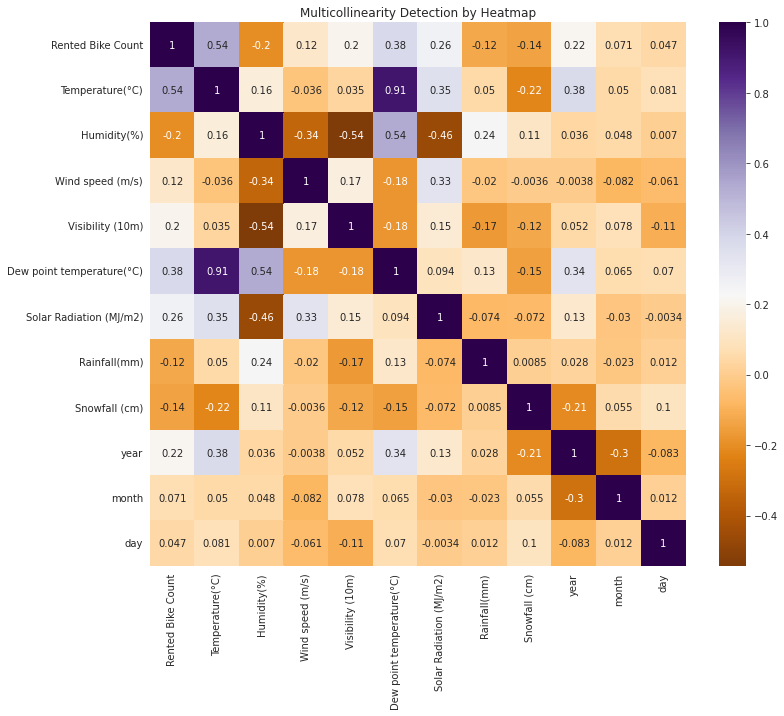

In [30]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap='PuOr')
plt.title('Multicollinearity Detection by Heatmap')

**Observation:**

 We can see that there is **strong correlation** between the **temperature** and **dew point temperature** features which may cause trouble during the prediction. We will find/detect this type of multicollinearity in a different way ahead.

In [31]:
# detecting multicollinearity by VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
attributes = df[['Temperature(°C)','Dew point temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']]
VIF = pd.DataFrame()
VIF["feature"] = attributes.columns 
#calculating VIF
VIF["Variance Inflation Factor"] = [variance_inflation_factor(attributes.values, i)
                          for i in range(len(attributes.columns))]
  
print(VIF)

                     feature  Variance Inflation Factor
0            Temperature(°C)                  29.075866
1  Dew point temperature(°C)                  15.201989
2                Humidity(%)                   5.069743
3           Wind speed (m/s)                   4.517664
4           Visibility (10m)                   9.051931
5    Solar Radiation (MJ/m2)                   2.821604
6               Rainfall(mm)                   1.079919
7              Snowfall (cm)                   1.118903


In [32]:
# watching correlation between target variable and remaining independent variable
df.corr()['Rented Bike Count']

Rented Bike Count            1.000000
Temperature(°C)              0.538558
Humidity(%)                 -0.199780
Wind speed (m/s)             0.121108
Visibility (10m)             0.199280
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
year                         0.215162
month                        0.070861
day                          0.046849
Name: Rented Bike Count, dtype: float64

Temperature has more correlation with Dependend varaible, so lets drop Due point temp. from list and check VIF

In [33]:
# detecting multicollinearity by VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
attributes = df[['Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']]
VIF = pd.DataFrame()
VIF["feature"] = attributes.columns 
#calculating VIF
VIF["Variance Inflation Factor"] = [variance_inflation_factor(attributes.values, i)
                          for i in range(len(attributes.columns))]
  
print(VIF)

                   feature  Variance Inflation Factor
0          Temperature(°C)                   3.166007
1              Humidity(%)                   4.758651
2         Wind speed (m/s)                   4.079926
3         Visibility (10m)                   4.409448
4  Solar Radiation (MJ/m2)                   2.246238
5             Rainfall(mm)                   1.078501
6            Snowfall (cm)                   1.118901


Now VIF is preety much normal and hence Dropping Dew Point temperature would be better choice

In [34]:
df.drop(['Dew point temperature(°C)'],axis=1,inplace=True)

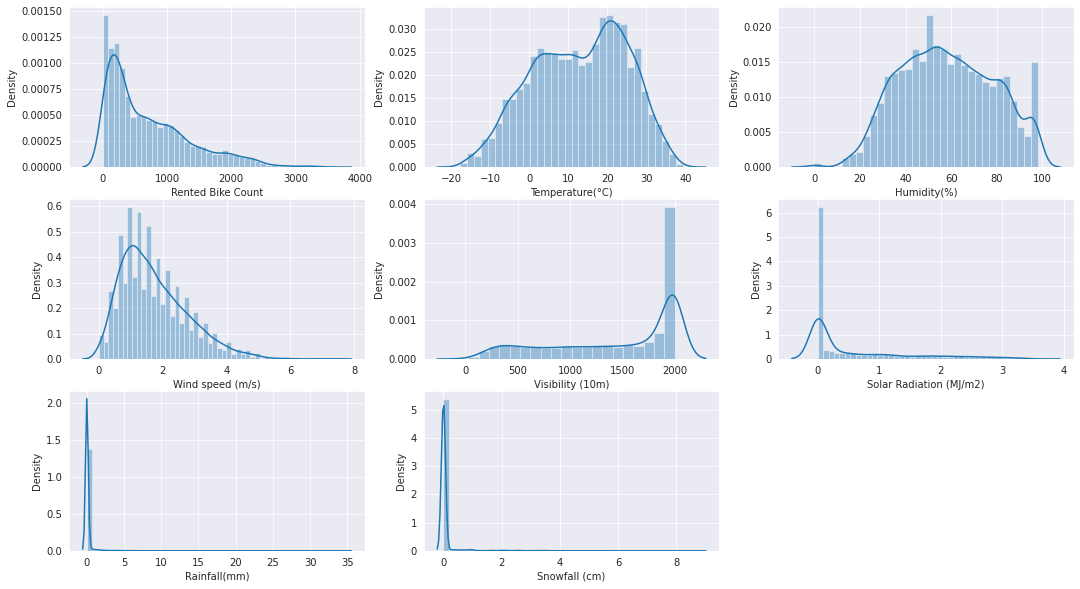

In [35]:
# checking distribution of Coubtinous Vriable
numrical_col=['Rented Bike Count','Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
plt.figure(figsize=(18,10))
n=1
for i in numrical_col:
  plt.subplot(3,3,n)
  n=n+1
  sns.distplot(df[i])

Right skewed 
1. Rented Bike Count
2. Wind speed (m/s)
3. 'Solar Radiation (MJ/m2)', 
4. 'Rainfall(mm)', 
5. 'Snowfall (cm)'

In [36]:
# Rented bike count,Solar Radiation --> Right skewed & include zero value ---> log1p
# rainfall, snowfall --> positively skewed


In [37]:
df.skew().sort_values(ascending=False)

Rainfall(mm)               14.533232
Snowfall (cm)               8.440801
Solar Radiation (MJ/m2)     1.504040
Rented Bike Count           1.153428
Wind speed (m/s)            0.890955
Humidity(%)                 0.059579
day                         0.007522
Hour                        0.000000
month                      -0.010458
Temperature(°C)            -0.198326
Visibility (10m)           -0.701786
year                       -2.978262
dtype: float64

In [38]:
from sklearn.preprocessing import PowerTransformer
sc_X=PowerTransformer(method = 'yeo-johnson')
df[numrical_col]=sc_X.fit_transform(df[numrical_col])

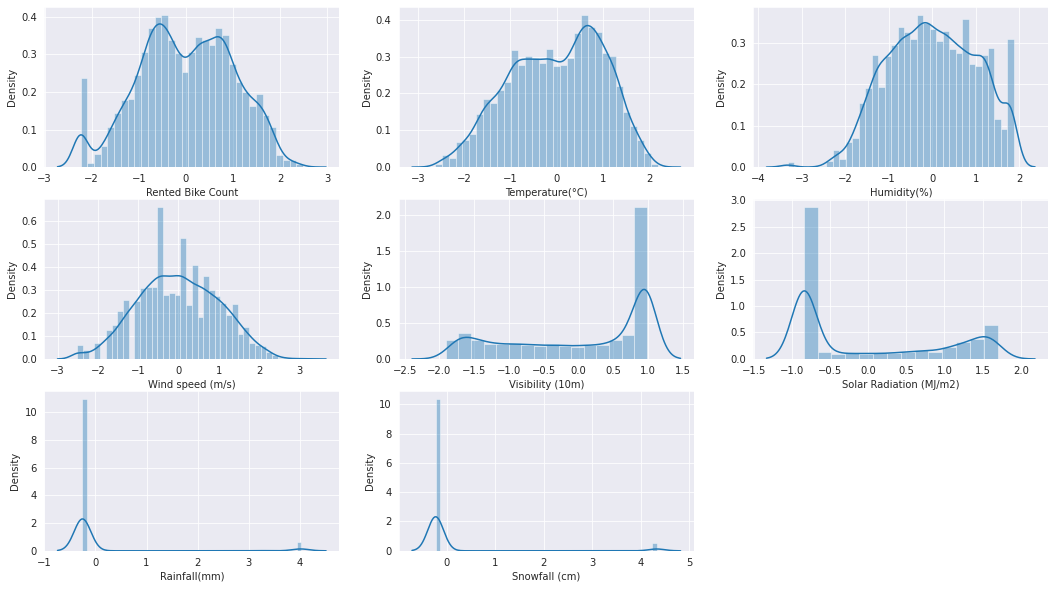

In [39]:
# Data distribution after applying Power Transformer
plt.figure(figsize=(18,10))
n=1
for i in numrical_col:
  plt.subplot(3,3,n)
  n=n+1
  sns.distplot(df[i])

**Encoding**

In [40]:
df.head().T

,0,1,2,3,4
Date,2017-01-12 00:00:00,2017-01-12 00:00:00,2017-01-12 00:00:00,2017-01-12 00:00:00,2017-01-12 00:00:00
Rented Bike Count,-0.530004,-0.676497,-0.779424,-1.047379,-1.200315
Hour,0,1,2,3,4
Temperature(°C),-1.524521,-1.55087,-1.594819,-1.612409,-1.594819
Humidity(%),-1.038829,-0.986482,-0.934363,-0.882465,-1.09141
Wind speed (m/s),0.618103,-0.923651,-0.640327,-0.778203,0.700184
Visibility (10m),0.978214,0.978214,0.978214,0.978214,0.978214
Solar Radiation (MJ/m2),-0.845761,-0.845761,-0.845761,-0.845761,-0.845761
Rainfall(mm),-0.252859,-0.252859,-0.252859,-0.252859,-0.252859
Snowfall (cm),-0.230785,-0.230785,-0.230785,-0.230785,-0.230785


columns to encode

1. Seasons
2. Holiday
3. Functioning Day
4. day_name 
5. year 

In [41]:
df.replace({'Holiday': { 'No Holiday': 0,'Holiday': 1 },'Functioning Day': { 'Yes': 0,'No': 1},'year':{2017:0,2018:1}},inplace=True)

In [42]:
df1=df.copy()
df1.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day,day_name
0,2017-01-12,-0.530004,0,-1.524521,-1.038829,0.618103,0.978214,-0.845761,-0.252859,-0.230785,Winter,0,0,0,1,12,Thursday
1,2017-01-12,-0.676497,1,-1.550870,-0.986482,-0.923651,0.978214,-0.845761,-0.252859,-0.230785,Winter,0,0,0,1,12,Thursday
2,2017-01-12,-0.779424,2,-1.594819,-0.934363,-0.640327,0.978214,-0.845761,-0.252859,-0.230785,Winter,0,0,0,1,12,Thursday
3,2017-01-12,-1.047379,3,-1.612409,-0.882465,-0.778203,0.978214,-0.845761,-0.252859,-0.230785,Winter,0,0,0,1,12,Thursday
4,2017-01-12,-1.200315,4,-1.594819,-1.091410,0.700184,0.978214,-0.845761,-0.252859,-0.230785,Winter,0,0,0,1,12,Thursday


In [43]:
df.shape

(8760, 17)

In [44]:
#df['Hour'].value_counts()

In [45]:
dummy_col=pd.get_dummies(df[['Seasons','day_name','Hour']],drop_first=True)

In [46]:
dummy_col.columns

Index(['Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'day_name_Monday',
       'day_name_Saturday', 'day_name_Sunday', 'day_name_Thursday',
       'day_name_Tuesday', 'day_name_Wednesday', 'Hour_1', 'Hour_2', 'Hour_3',
       'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10',
       'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16',
       'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22',
       'Hour_23'],
      dtype='object')

In [47]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day', 'year', 'month', 'day', 'day_name'],
      dtype='object')

In [48]:
df.drop(['Seasons','day_name','Hour','Date','day'],axis=1,inplace=True)

In [49]:
df=df.join(dummy_col)

In [50]:
df.head().T

,0,1,2,3,4
Rented Bike Count,-0.530004,-0.676497,-0.779424,-1.047379,-1.200315
Temperature(°C),-1.524521,-1.550870,-1.594819,-1.612409,-1.594819
Humidity(%),-1.038829,-0.986482,-0.934363,-0.882465,-1.091410
Wind speed (m/s),0.618103,-0.923651,-0.640327,-0.778203,0.700184
Visibility (10m),0.978214,0.978214,0.978214,0.978214,0.978214
Solar Radiation (MJ/m2),-0.845761,-0.845761,-0.845761,-0.845761,-0.845761
Rainfall(mm),-0.252859,-0.252859,-0.252859,-0.252859,-0.252859
Snowfall (cm),-0.230785,-0.230785,-0.230785,-0.230785,-0.230785
Holiday,0.000000,0.000000,0.000000,0.000000,0.000000
Functioning Day,0.000000,0.000000,0.000000,0.000000,0.000000


In [51]:
df.shape

(8760, 44)

In [52]:
df.columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Functioning Day', 'year',
       'month', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'day_name_Monday', 'day_name_Saturday', 'day_name_Sunday',
       'day_name_Thursday', 'day_name_Tuesday', 'day_name_Wednesday', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
       'Hour_21', 'Hour_22', 'Hour_23'],
      dtype='object')

In [53]:
len(df.columns)

44

In [54]:
df.drop(['year','month'],axis=1,inplace=True)

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler

#Import the Models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [56]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [57]:
X=df.drop(columns=['Rented Bike Count'])
y=df['Rented Bike Count']

In [58]:
# splitting data into Training & Testing
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [59]:
X_train.shape , X_test.shape

((7008, 41), (1752, 41))

In [60]:
X_train.head()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Seasons_Spring,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
8415,0.034929,0.165211,1.751274,-1.239600,1.184766,-0.252859,-0.230785,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5049,0.837072,1.336007,0.164227,-1.467367,0.970875,-0.252859,-0.230785,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8395,-0.131206,-0.575391,-0.151106,-1.031045,-0.845761,-0.252859,-0.230785,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1535,-1.296943,0.547351,0.445829,-0.113054,-0.845761,-0.252859,-0.230785,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5518,1.191219,0.735596,-0.041752,-0.828146,-0.845761,-0.252859,-0.230785,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [61]:
X_test.head()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Seasons_Spring,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
6056,1.191219,0.547351,0.261479,0.976155,0.908929,-0.252859,-0.230785,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5556,1.635007,-0.324588,0.533376,-1.129058,1.679325,-0.252859,-0.230785,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5990,1.749910,-0.374407,-0.384415,0.465697,1.460000,-0.252859,-0.230785,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7674,0.341527,-0.524881,-0.151106,0.260537,-0.339173,-0.252859,-0.230785,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3319,-0.531475,-0.324588,-0.640327,-0.177075,-0.055911,-0.252859,-0.230785,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [62]:
numrical_col

['Rented Bike Count',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [63]:
categorical_col=['Holiday', 'Functioning Day',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'day_name_Monday',
       'day_name_Saturday', 'day_name_Sunday', 'day_name_Thursday',
       'day_name_Tuesday', 'day_name_Wednesday', 'Hour_Second half',
       'Hour_Third half', 'Hour_fourth half']

categorical_col

['Holiday',
 'Functioning Day',
 'Seasons_Spring',
 'Seasons_Summer',
 'Seasons_Winter',
 'day_name_Monday',
 'day_name_Saturday',
 'day_name_Sunday',
 'day_name_Thursday',
 'day_name_Tuesday',
 'day_name_Wednesday',
 'Hour_Second half',
 'Hour_Third half',
 'Hour_fourth half']

In [64]:
scaler = MinMaxScaler()
scaling_cols = ['Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']
X_train[scaling_cols]=scaler.fit_transform(X_train[scaling_cols])
X_test[scaling_cols]=scaler.transform(X_test[scaling_cols])

In [65]:
X_train.shape

(7008, 41)

In [66]:
X_test.shape

(1752, 41)

In [67]:
X_train.head()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Seasons_Spring,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
8415,0.553520,0.670878,0.749760,0.230666,0.797911,0.0,0.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5049,0.719506,0.896017,0.470689,0.151656,0.713861,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8395,0.519142,0.528464,0.415240,0.303011,0.000000,0.0,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1535,0.277919,0.744362,0.520207,0.621452,0.000000,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5518,0.792789,0.780561,0.434469,0.373395,0.000000,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [68]:
# defining function to fit model get evaluation metrics also cross validation score

def fit_evaluate (model):
  model.fit(X_train,Y_train)
  y_pred=model.predict(X_test)
 
  MSE  = mean_squared_error(Y_test, y_pred)
  print("MSE:" ,MSE)
  MAE=mean_absolute_error(Y_test, y_pred)
  print("MAE :" ,MAE)

  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  r2 = r2_score(Y_test, y_pred)
  print("R2 :" ,r2)
  Adjusted_R2 = 1-(1-r2_score(Y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",Adjusted_R2)

  # measuring the accuracy of the model against the training data & testing daya
  print('                          ')
  print("-------Model accuracy-------")
  print(f"Traing score: {round(model.score(X_train,Y_train)*100)}%")
  print(f"Testing score: {round(model.score(X_test,Y_test)*100)}%")
  print('                          ')
  print("-------cross_val_score-------")
  accuracies = cross_val_score(estimator = model, X = X_train, y = Y_train, cv = 5)
  print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))

  # Ploting graph of actual vs predicted
  plt.figure(figsize=(20,10))
  plt.plot((y_pred)[:100])
  plt.plot((np.array(Y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title(f'Difference in predicted & actual for {model}')
  plt.show()

MSE: 0.1893724206692547
MAE : 0.3315121167571847
RMSE : 0.4351694160545462
R2 : 0.8081736975803846
Adjusted R2 :  0.8035743534872828
                          
-------Model accuracy-------
Traing score: 81%
Testing score: 81%
                          
-------cross_val_score-------
Cross Val Accuracy: 80.61 %


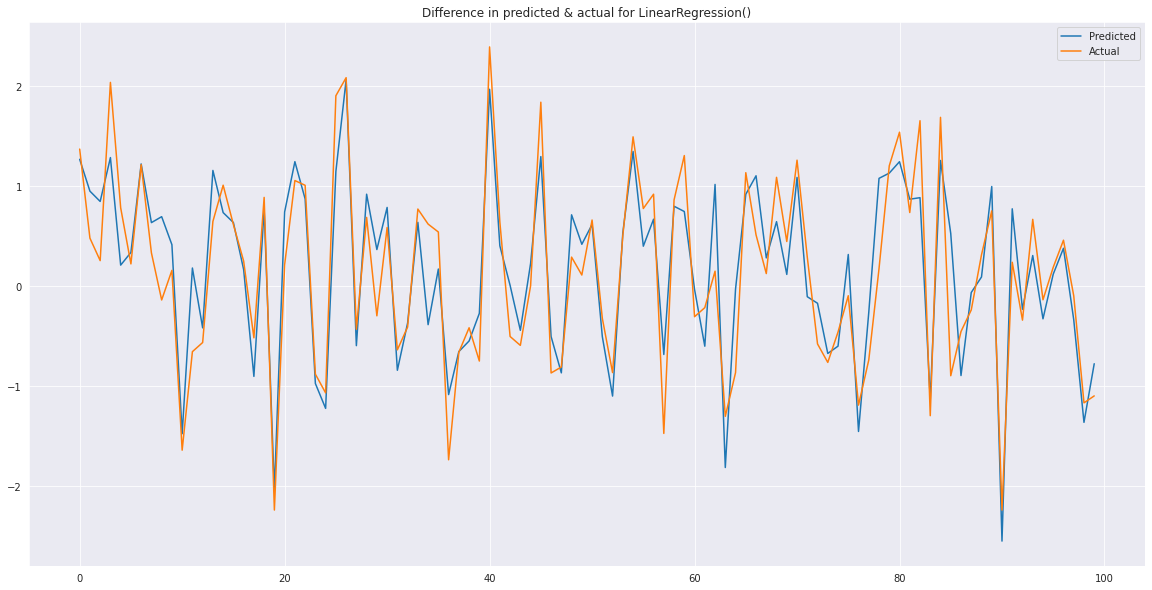

In [69]:
lr= LinearRegression()
fit_evaluate(lr)

In [70]:
# Applying Polynomial Linear Regression
# degree 2
poly = PolynomialFeatures(degree=2,include_bias=True)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [71]:
lr = LinearRegression()
lr.fit(X_train_trans,Y_train)
y_pred1 = lr.predict(X_test_trans)

In [72]:
print(f"Training score: {lr.score(X_train_trans,Y_train)}")
print(f"Training score: {lr.score(X_test_trans,Y_test)}")

Training score: 0.9195524651144995
Training score: 0.8978325510180052


MSE : 0.1008605018356676
MAE : 0.22164356555917036
RMSE : 0.3175854244698072
R2 : 0.8978325510180052
Adjusted R2 :  0.8953829221242848


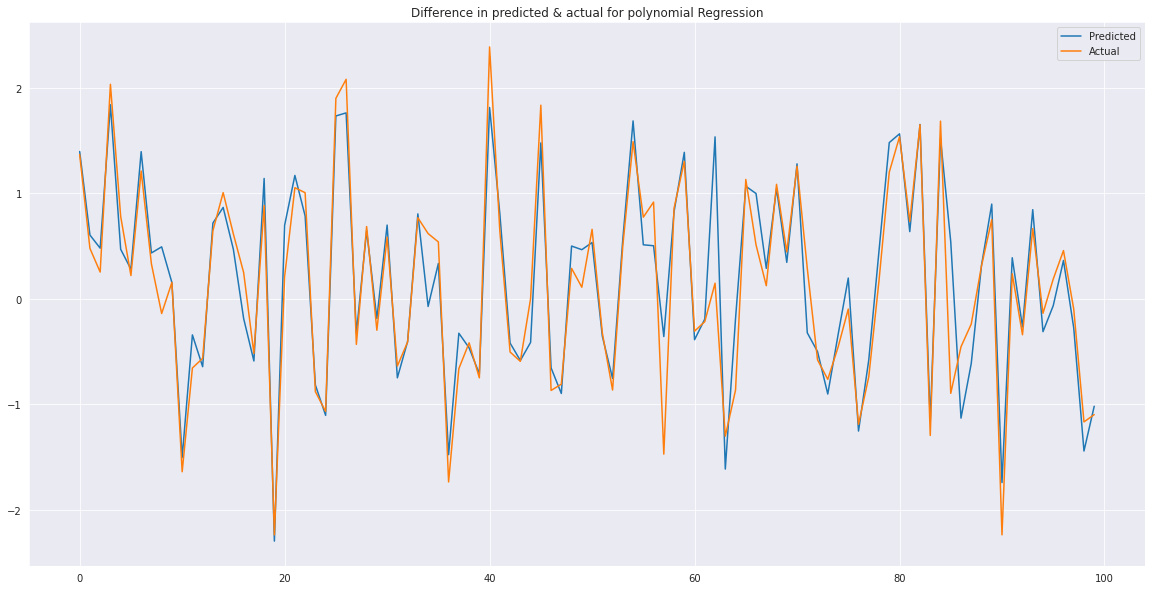

In [73]:
MSE  = mean_squared_error(Y_test, y_pred1)
print("MSE :" , MSE)

MAE=mean_absolute_error(Y_test, y_pred1)
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(Y_test, y_pred1)
print("R2 :" ,r2)
Adjusted_R2 = 1-(1-r2_score(Y_test, y_pred1))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",Adjusted_R2)

 # Ploting graph of actual vs predicted
plt.figure(figsize=(20,10))
plt.plot((y_pred1)[:100])
plt.plot((np.array(Y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title(f'Difference in predicted & actual for polynomial Regression')
plt.show()

**Ridge** 

MSE: 0.19057620329991135
MAE : 0.3332642906873856
RMSE : 0.43655034451929065
R2 : 0.8069543163730275
Adjusted R2 :  0.8023257356544861
                          
-------Model accuracy-------
Traing score: 81%
Testing score: 81%
                          
-------cross_val_score-------
Cross Val Accuracy: 80.45 %


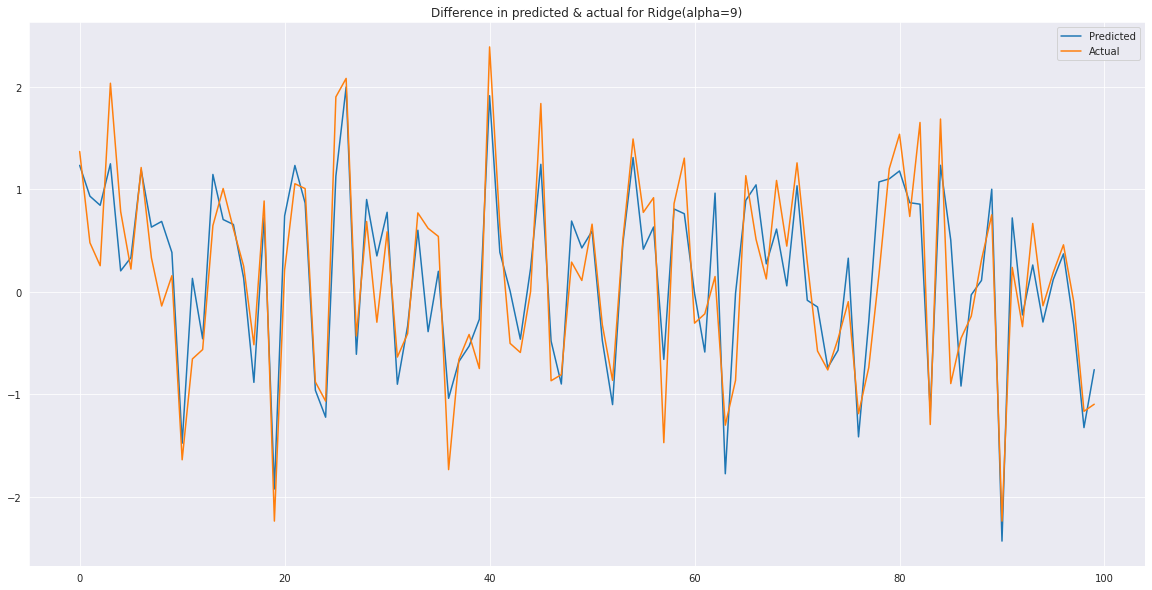

In [74]:
R=Ridge(alpha=9)
fit_evaluate(R)

**Decision Tree**

MSE: 0.1581612366095755
MAE : 0.2628629834824524
RMSE : 0.3976949039270877
R2 : 0.8397893151615899
Adjusted R2 :  0.8359480063438269
                          
-------Model accuracy-------
Traing score: 96%
Testing score: 84%
                          
-------cross_val_score-------
Cross Val Accuracy: 81.89 %


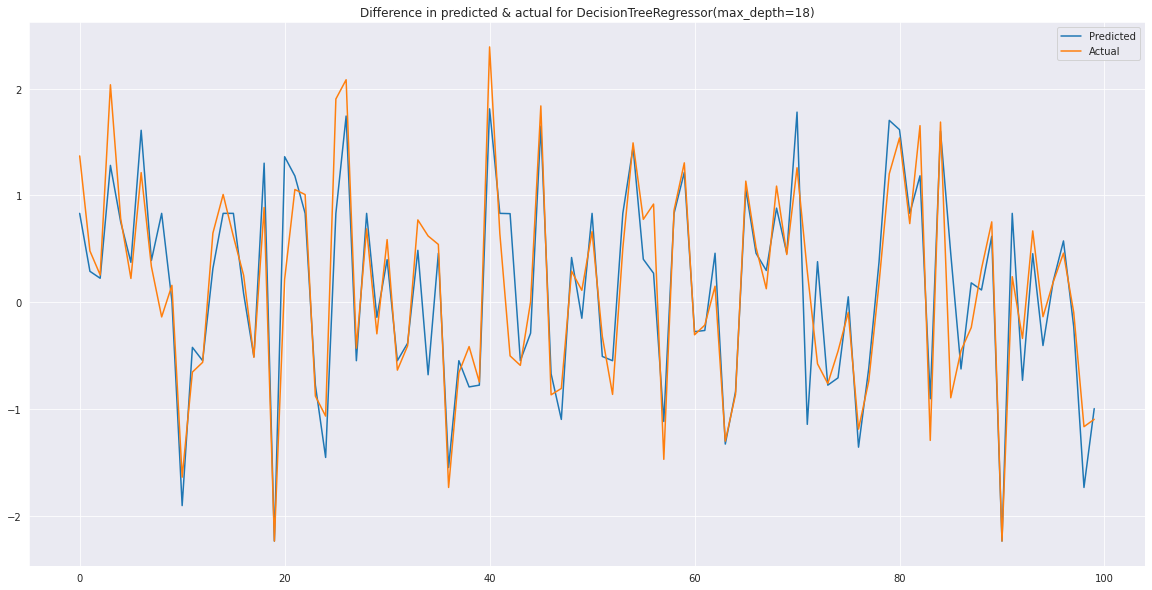

In [75]:
regressor=DecisionTreeRegressor(max_depth=18)
fit_evaluate(regressor)

**BaggingRegressor**

MSE: 0.10161158210114904
MAE : 0.21529982389698127
RMSE : 0.31876571663393954
R2 : 0.8970717382785446
Adjusted R2 :  0.8946038676758664
                          
-------Model accuracy-------
Traing score: 98%
Testing score: 90%
                          
-------cross_val_score-------
Cross Val Accuracy: 88.88 %


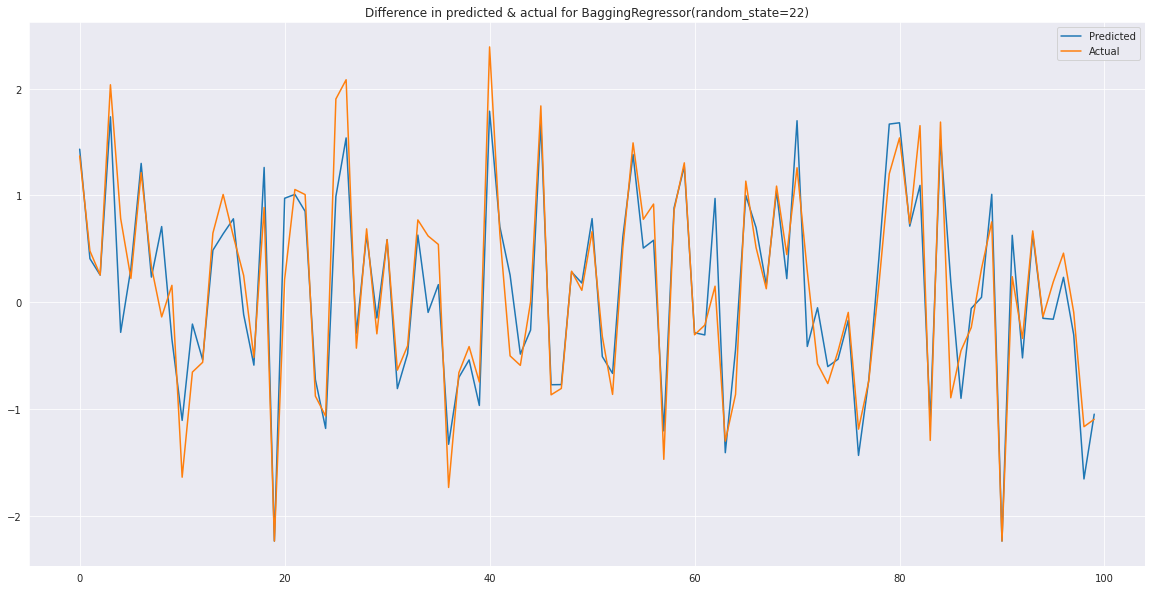

In [76]:
bag_regressor= BaggingRegressor(random_state=22)
fit_evaluate(bag_regressor)

**Random Forest**

MSE: 0.09970960909093624
MAE : 0.2160918249994193
RMSE : 0.3157682838584905
R2 : 0.8989983569939923
Adjusted R2 :  0.8965766801733804
                          
-------Model accuracy-------
Traing score: 98%
Testing score: 90%
                          
-------cross_val_score-------
Cross Val Accuracy: 89.03 %


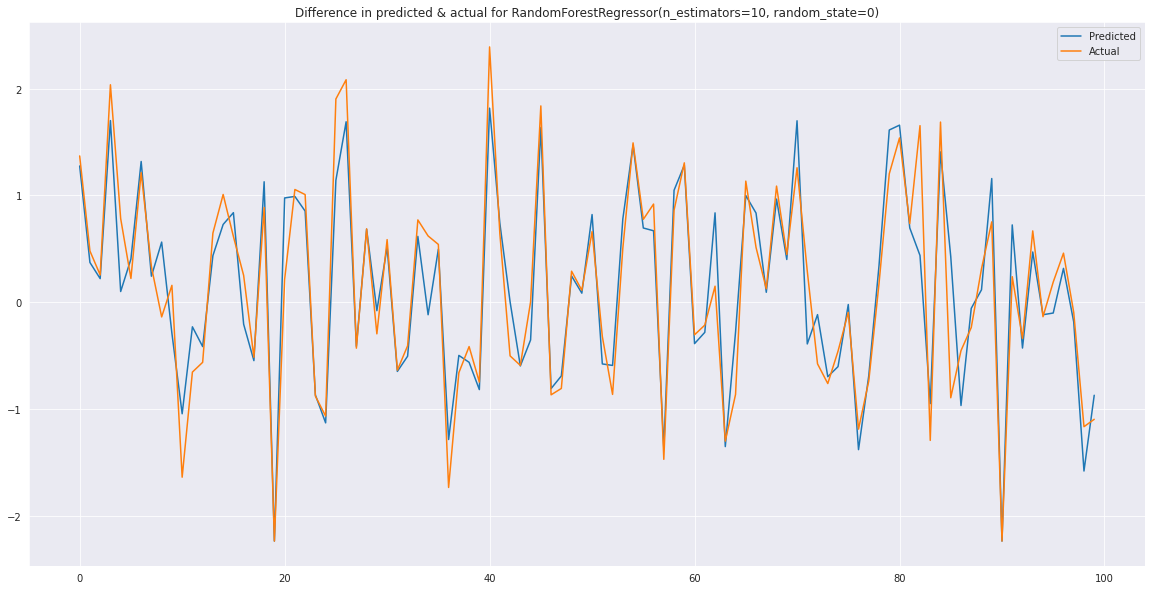

In [77]:
random_forest=RandomForestRegressor(n_estimators=10,random_state=0)
fit_evaluate(random_forest)

**Randomized Search Cv**

In [78]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['mse','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['mse', 'gini']}


In [79]:
random_forest_best=RandomForestRegressor()

In [80]:
model_randomcv=RandomizedSearchCV(estimator=random_forest_best,param_distributions=random_grid,n_iter=10,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
model_randomcv.fit(X_train,Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [81]:
model_randomcv.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 120,
 'criterion': 'mse'}

MSE: 0.09741316157093563
MAE : 0.2234305527721175
RMSE : 0.3121108161710126
R2 : 0.9013245618072676
Adjusted R2 :  0.8989586594880267
                          
-------Model accuracy-------
Traing score: 99%
Testing score: 90%
                          
-------cross_val_score-------
Cross Val Accuracy: 89.52 %


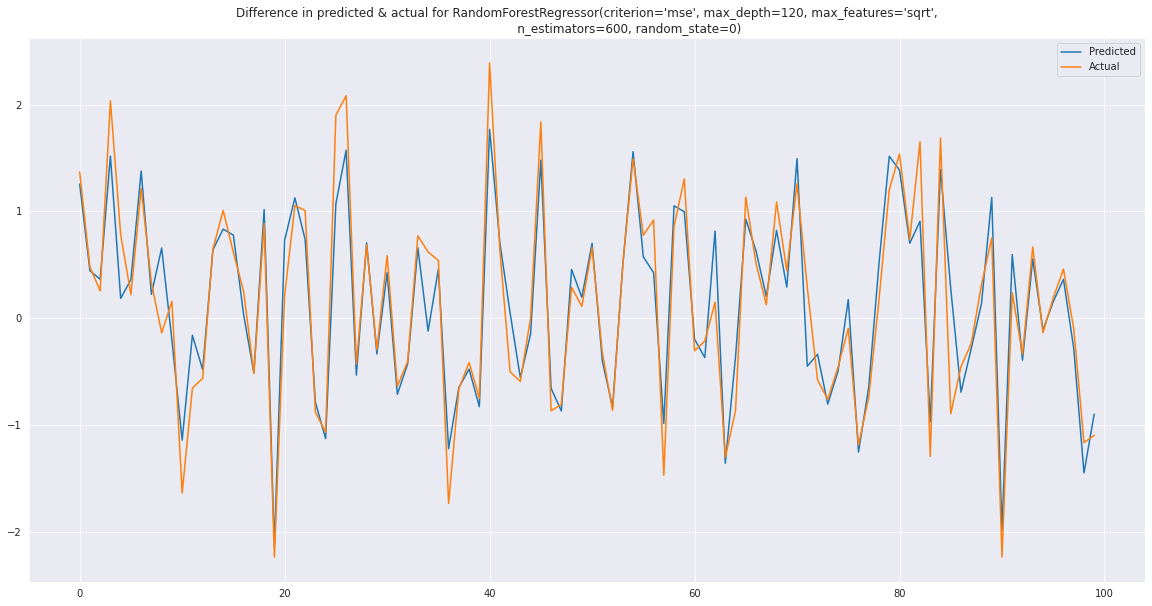

In [82]:
random_forest=RandomForestRegressor(n_estimators=600,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=120,criterion='mse',random_state=0)
fit_evaluate(random_forest)

**Adaboost**

In [83]:
# weakbase --> accuracy 50% or just more than 50%
# decision stump -> smallest decision tree, depth=1
# adaboost--> join multiple weakbase and create strong learner
# weaklearner of adaboost--> Decision stump

MSE: 0.10161158210114904
MAE : 0.21529982389698127
RMSE : 0.31876571663393954
R2 : 0.8970717382785446
Adjusted R2 :  0.8946038676758664
                          
-------Model accuracy-------
Traing score: 98%
Testing score: 90%
                          
-------cross_val_score-------
Cross Val Accuracy: 88.88 %


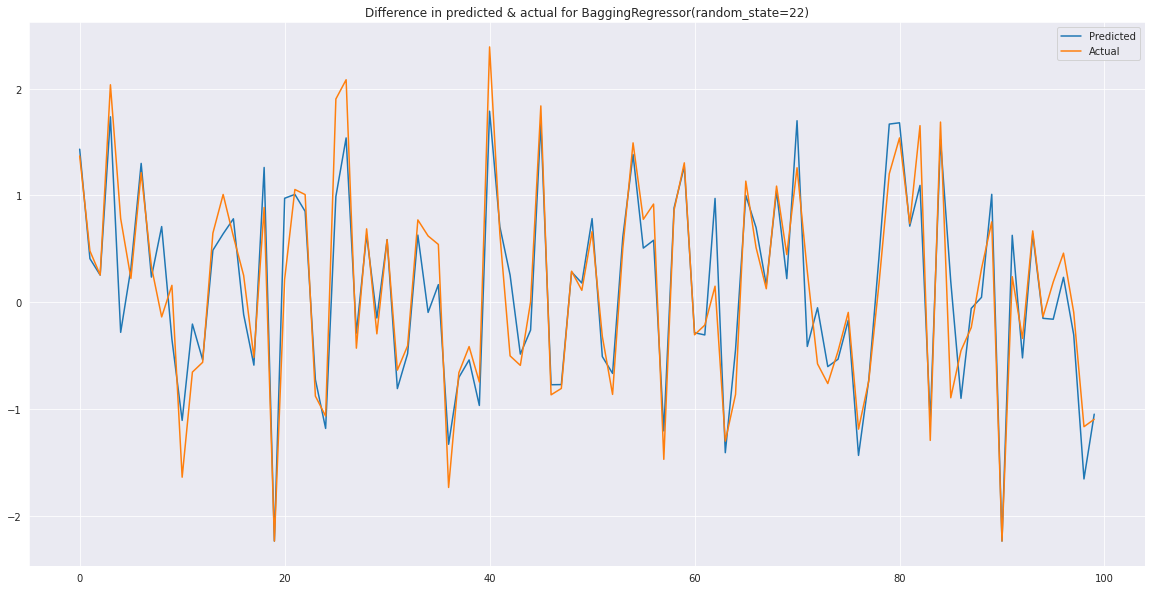

In [84]:
ada_regressor= BaggingRegressor(random_state=22)
fit_evaluate(ada_regressor)

**Gradientboost**

MSE: 0.13413294081817703
MAE : 0.2765263105424441
RMSE : 0.3662416426598388
R2 : 0.8641289688388221
Adjusted R2 :  0.8608712423606886
                          
-------Model accuracy-------
Traing score: 87%
Testing score: 86%
                          
-------cross_val_score-------
Cross Val Accuracy: 85.87 %


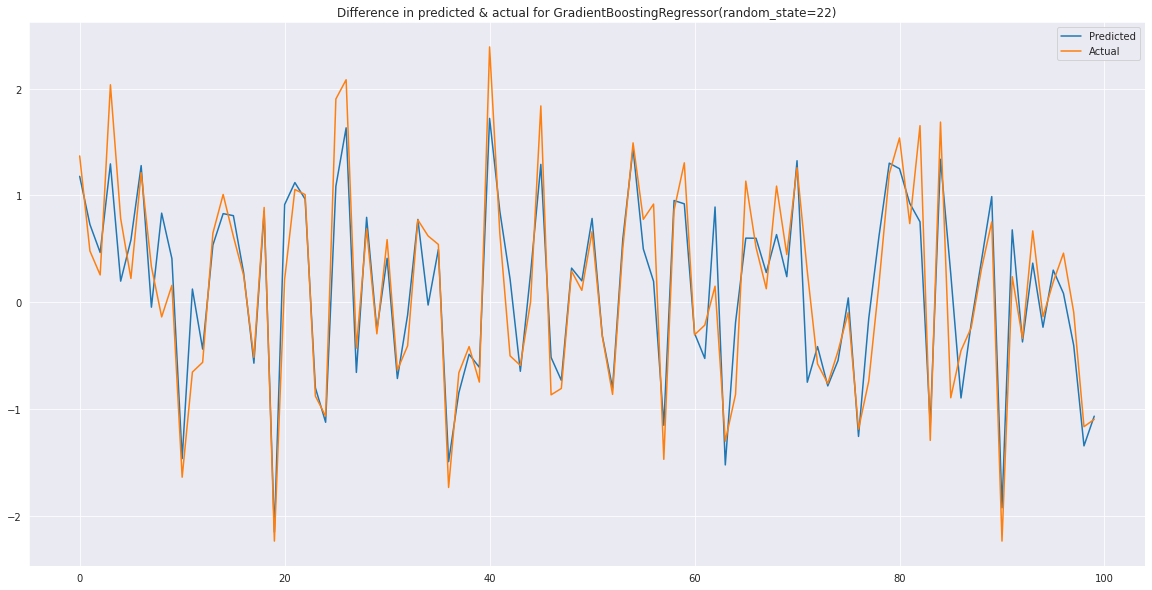

In [85]:
gb= GradientBoostingRegressor(random_state=22)
fit_evaluate(gb)